<a href="https://colab.research.google.com/github/Fatemehkiasaveh/Defects_Detection/blob/main/defect_detection_analyze_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze histogram of the images and if we can use it to detect where are the detect candidates

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/

Mounted at /content/drive
/content/drive


In [ ]:
sample_image2 = cv2.imread("/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/sample_2.bmp")
#print(len(sample_image2))
#print(sample_image2.shape)
#plt.imshow(sample_image2)

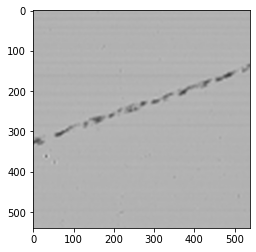

In [7]:
sample_image1 = cv2.imread("/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/1.jpg")
plt.imshow(sample_image1)
 

In [3]:
img1 = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/Images/28774`104`71`17`0.bmp')

In [3]:
img1 = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/Images/28853`64`71`17`1.bmp')
img2 = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/Images/28863`2696`71`17`3.bmp')

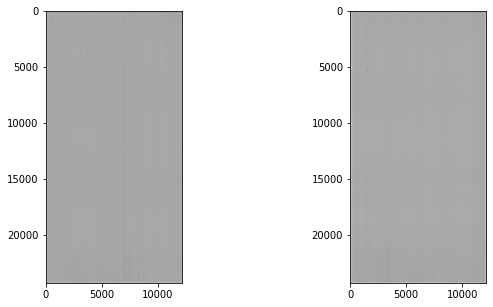

In [ ]:
imshow([img1,img2])

Histogram Calculation in Open CV

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/sample_images/1.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,255])

Histogram Calculation in Numpy

In [ ]:
hist, bin = np.histogram(img.ravel(),256,[0,256])

<function matplotlib.pyplot.show(*args, **kw)>

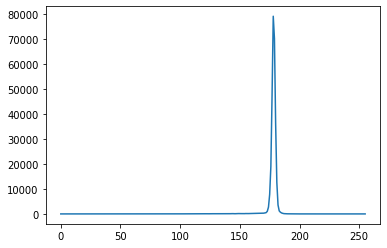

In [ ]:
plt.plot(bin[0:-1],hist)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

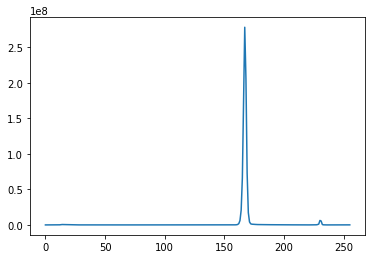

In [ ]:
hist, bin = np.histogram(img1.ravel(),256,[0,256])
plt.plot(bin[0:-1],hist)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

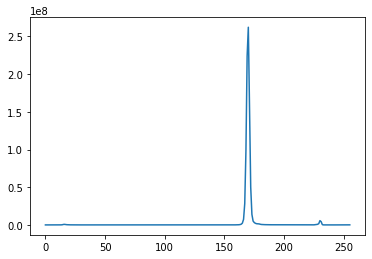

In [ ]:
hist, bin = np.histogram(img2.ravel(),256,[0,256])
plt.plot(bin[0:-1],hist)
plt.show

Plotting Histograms

1. Using Matplotlib

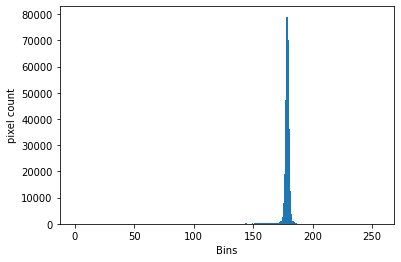

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

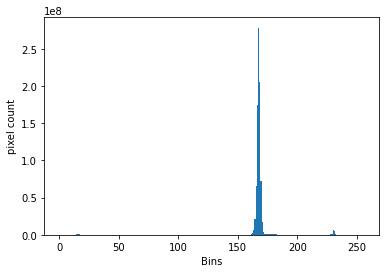

In [ ]:
plt.hist(img1.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

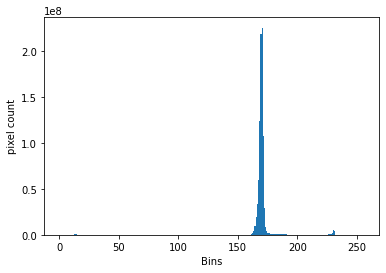

In [ ]:
plt.hist(img2.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

  2.Using Open CV

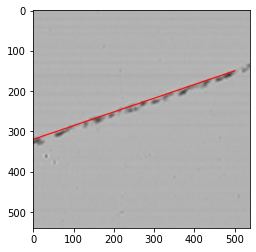

In [ ]:
image1 = sample_image1.copy()
line_ = cv2.line(image1,(0,320),(500,150),256,2)
plt.imshow(line_)

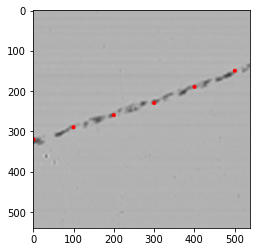

In [ ]:
image2 = sample_image1.copy()
pts = np.array([[1,320],[100,290],[200,260],[300,230],[400,190],[500,150]], np.int32)
pts = pts.reshape((-1,1,2))
polyline_ = cv2.polylines(image2,pts,True,256,10)
plt.imshow(polyline_)

Application of Mask

In [ ]:
def mask(img,x1,y1,x2,y2):

  #create a mask
  mask = np.zeros(img.shape[:2], np.uint8)
  mask[x1:y1, x2:y2] = 255
  masked_img = cv2.bitwise_and(img, img, mask=mask)

  #calculate histogram with and without mask
  #check third agrgument for mask
  hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
  hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

  plt.subplot(221) , plt.imshow(img, 'gray')
  plt.subplot(222) , plt.imshow(mask, 'gray')
  plt.subplot(223) , plt.imshow(masked_img, 'gray')
  plt.subplot(224) , plt.plot(hist_full) , plt.plot(hist_mask)
  plt.xlabel("Bins")
  plt.ylabel("pixel count")
  plt.xlim([0,256])
  plt.show()

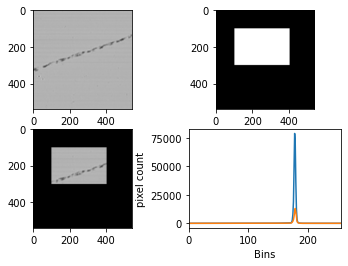

In [ ]:
mask(sample_image1,100,300,100,400)

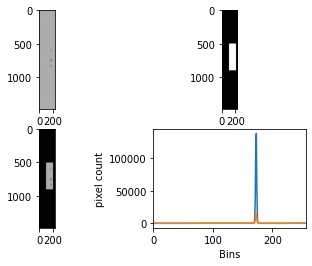

In [ ]:
mask(sample_image2,500,900,100,200)

In [ ]:
def imshow(images):
  image_num = len(images)
  plt.figure(figsize=(10,5))
  for i in range(image_num):
    plt.subplot(1,image_num,i+1)
    plt.imshow(images[i],cmap='gray')

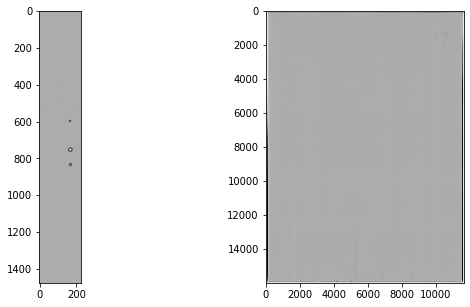

In [ ]:
img1_cropped = cv2.imread('/content/drive/MyDrive/Tensurf_Defect_Detection_FIles/cropped_images/28774`104`71`17`0.bmp')
imshow([img1_cropped,img1])

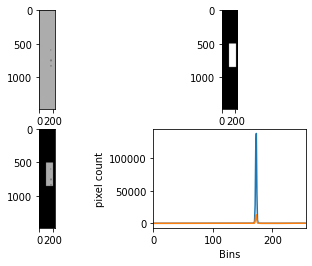

In [ ]:
mask(img1_cropped,500,850,100,200)

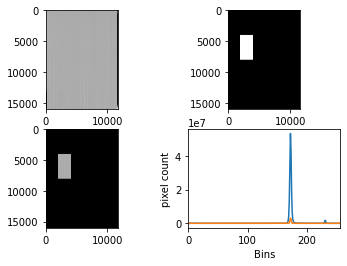

In [ ]:
mask(img1,4000,8000,2000,4000)

Otsu thresholding

In [ ]:
type(sample_image1)

(numpy.ndarray, numpy.ndarray)

In [ ]:
  img = sample_image1.copy()
  preprocessed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_image = cv2.bitwise_not(preprocessed_image)

In [ ]:
thre, img_bin = cv2.threshold(preprocessed_image,-1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

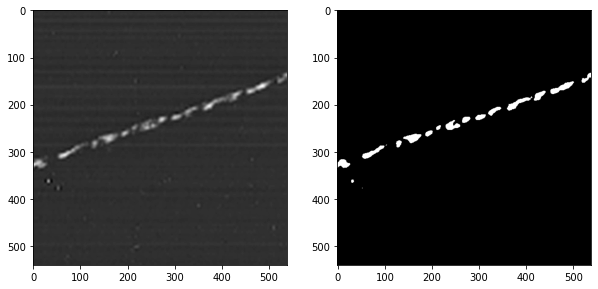

In [ ]:
imshow([preprocessed_image,img_bin])

In [ ]:
thre

104.0

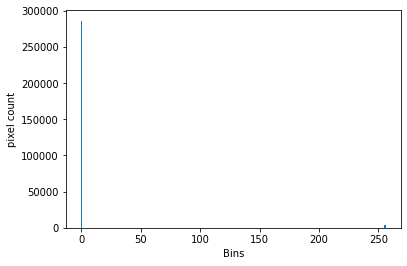

In [ ]:
plt.hist(img_bin.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

In [ ]:
  img = img1.copy()
  preprocessed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_image = cv2.bitwise_not(preprocessed_image)

In [ ]:
thre, img_bin = cv2.threshold(preprocessed_image,-1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

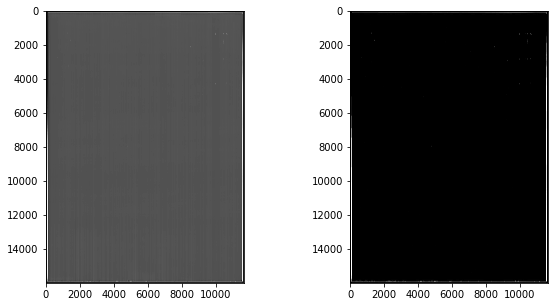

In [ ]:
imshow([preprocessed_image,img_bin])

In [ ]:
thre

159.0

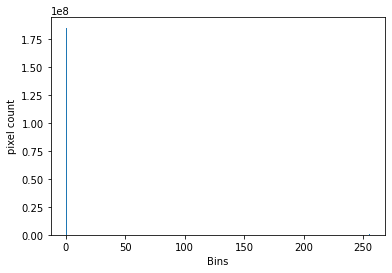

In [ ]:
plt.hist(img_bin.ravel(),256,[0,256])
plt.xlabel("Bins")
plt.ylabel("pixel count")
plt.show()

Cumulative Distributive Function


In [4]:
hist = cv2.calcHist([img1],[0],None,[256],[0,255])


In [4]:
def cal_cdf(hist, imshow=True):
  cdf = np.cumsum(hist)
  cdf /= np.max(cdf)
  if imshow:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(cdf)
  return cdf

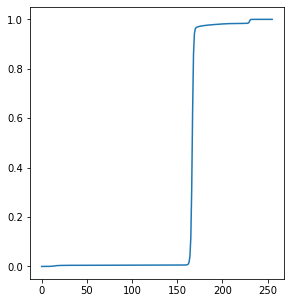

In [6]:
cdf = cal_cdf(hist)

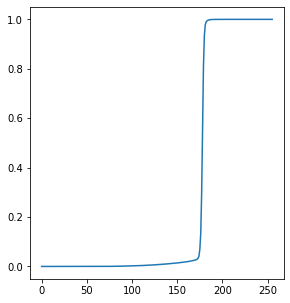

In [8]:
hist = cv2.calcHist([sample_image1],[0],None,[256],[0,255])
cdf = cal_cdf(hist)

Histogram equalization

In [9]:
def hist_equ(image):
  hist = cv2.calcHist([image],[0],None,[256],[0,255])
  cdf = cal_cdf(hist, imshow= False)
  gray_map = np.array([round(cdf[i]*255) for i in range(256)]).astype(np.uint8)
  out_image = cv2.LUT(image, gray_map)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(image, cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(out_image, cmap='gray')
   

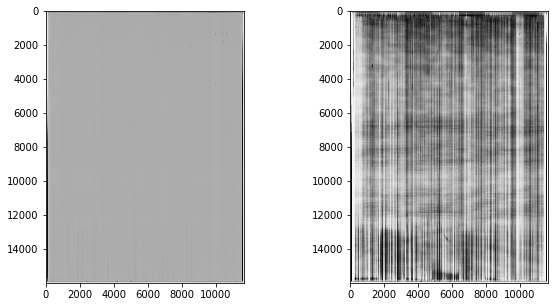

In [10]:
hist_equ(img1)

In [12]:
def hist_equ(image):
  hist = cv2.calcHist([image],[0],None,[256],[0,255])
  cdf = cal_cdf(hist, imshow= False)
  gray_map = np.array([round(cdf[i]*255) for i in range(256)]).astype(np.uint8)
  out_image = cv2.LUT(image, gray_map)
 
  return out_image
   

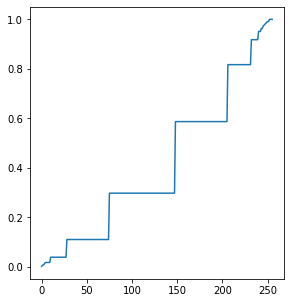

In [13]:
out_image = hist_equ(img1)
hist = cv2.calcHist([out_image],[0],None,[256],[0,255])
cdf = cal_cdf(hist)

https://www.sciencedirect.com/science/article/pii/S1319157816301070

The proposed algorithm
 

 1.Creating a background mask from the mean gray-level values of the entire original image (defective image).

2.
Sharpening the original image to increase the contrast along the boundaries between the defective regions and the background.

3.
Subtracting the mask from the image itself, thus extracting the features of the defective regions.

4.
Calculating the histogram for the resulting image (basically containing the features of the defects).

5.
Finding the extreme (highest gray level) value of the histogram.

6.
Selecting this value as the thresholding value to separate the defects from the background